# Machine Learning analysis on 5G attacks dataset

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
dfattacks_BS1  = pd.read_csv("BTS_1.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", 
                                                            "dDSb", "sTtl", "dTtl", "sHops", "dHops","Cause","TotPkts","SrcPkts","DstPkts","TotBytes",
                                                            "SrcBytes","DstBytes", "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad",
         "Loss","SrcLoss", "DstLoss", "pLoss", "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False,  header=0)
dfattacks_BS2  = pd.read_csv("BTS_2.csv", sep=",", names = ["Flgs", "Seq", "Dur", "RunTime", "Mean", "Sum", "Min", "Max", "Proto", "sTos", "dTos", "sDSb", "dDSb",
                                                            "sTtl", "dTtl", "sHops", "dHops", "Cause","TotPkts","SrcPkts","DstPkts","TotBytes","SrcBytes","DstBytes",
                                                            "Offset", "sMeanPktSz", "dMeanPktSz", "Load", "SrcLoad", "DstLoad","Loss","SrcLoss", "DstLoss", "pLoss",
                                                            "SrcGap", "DstGap", "Rate", "SrcRate", "DstRate", "State", "SrcWin", "DstWin", "sVid", "dVid", "SrcTCPBase", 
         "DstTCPBase", "TcpRtt", "SynAck", "AckDat", "Label", "Attack_Type", "Attack_Tool"], low_memory=False, header=0)

#data.head()
#data.info() # also checking for missing values 

In [9]:
dfattacks_BS1 = dfattacks_BS1.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [10]:
dfattacks_BS2 = dfattacks_BS2.drop(['dVid', 'SrcTCPBase','DstTCPBase', 'DstWin', 'SrcWin', 'sVid', 'SrcGap', 'DstGap', 'dHops', 'dTtl', 'dDSb', 'dTos'  ], axis=1)

In [11]:
CombBS1_BS2 = pd.concat([dfattacks_BS1, dfattacks_BS2] )

CombBS1_BS2.dropna(inplace=True)
CombBS1_BS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215676 entries, 0 to 487573
Data columns (total 40 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Flgs         1215676 non-null  object 
 1   Seq          1215676 non-null  int64  
 2   Dur          1215676 non-null  float64
 3   RunTime      1215676 non-null  float64
 4   Mean         1215676 non-null  float64
 5   Sum          1215676 non-null  float64
 6   Min          1215676 non-null  float64
 7   Max          1215676 non-null  float64
 8   Proto        1215676 non-null  object 
 9   sTos         1215676 non-null  float64
 10  sDSb         1215676 non-null  object 
 11  sTtl         1215676 non-null  float64
 12  sHops        1215676 non-null  float64
 13  Cause        1215676 non-null  object 
 14  TotPkts      1215676 non-null  int64  
 15  SrcPkts      1215676 non-null  int64  
 16  DstPkts      1215676 non-null  int64  
 17  TotBytes     1215676 non-null  int64  
 18  Src

In [12]:

CombBS1_BS2= CombBS1_BS2.drop(["Attack_Tool", "Attack_Type"], axis=1)

CombBS1_BS2["Label"].value_counts()

Malicious    738153
Benign       477523
Name: Label, dtype: int64

In [13]:
data_y = CombBS1_BS2["Label"].replace(['Malicious', 'Benign'],[0, 1])

In [14]:
data = CombBS1_BS2.drop(["Label"], axis=1)

In [16]:
data['Flgs'] = pd.factorize(data['Flgs'])[0]
data['Proto'] = pd.factorize(data['Proto'])[0]
data['Cause'] = pd.factorize(data['Cause'])[0]
data['State'] = pd.factorize(data['State'])[0]
data['sDSb'] = pd.factorize(data['sDSb'])[0]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215676 entries, 0 to 487573
Data columns (total 37 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Flgs        1215676 non-null  int64  
 1   Seq         1215676 non-null  int64  
 2   Dur         1215676 non-null  float64
 3   RunTime     1215676 non-null  float64
 4   Mean        1215676 non-null  float64
 5   Sum         1215676 non-null  float64
 6   Min         1215676 non-null  float64
 7   Max         1215676 non-null  float64
 8   Proto       1215676 non-null  int64  
 9   sTos        1215676 non-null  float64
 10  sDSb        1215676 non-null  int64  
 11  sTtl        1215676 non-null  float64
 12  sHops       1215676 non-null  float64
 13  Cause       1215676 non-null  int64  
 14  TotPkts     1215676 non-null  int64  
 15  SrcPkts     1215676 non-null  int64  
 16  DstPkts     1215676 non-null  int64  
 17  TotBytes    1215676 non-null  int64  
 18  SrcBytes    1215676 non

In [17]:
#Splitting the data
X_train, X_test,y_train, y_test = train_test_split(data, data_y, test_size=0.3, stratify=data_y)
y_train

520742    1
240996    1
345820    1
257761    1
329064    1
         ..
238837    0
258021    0
561240    1
30287     0
546767    1
Name: Label, Length: 850973, dtype: int64

In [18]:
X_train

,Flgs,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat
520742,5,1101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,...,0,0,0.0,0.000000,0.000000,0.000000,5,0.0,0.0,0.0
240996,0,77146,2.846753,2.846753,2.846753,2.846753,2.846753,2.846753,1,0.0,...,0,0,0.0,0.351277,0.351277,0.000000,5,0.0,0.0,0.0
345820,0,87520,2.573960,2.573960,2.573960,2.573960,2.573960,2.573960,1,0.0,...,0,0,0.0,0.388506,0.388506,0.000000,2,0.0,0.0,0.0
257761,0,93910,0.979621,0.979621,0.979621,0.979621,0.979621,0.979621,1,0.0,...,0,0,0.0,13.270438,7.145621,5.104015,1,0.0,0.0,0.0
329064,0,119037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,...,0,0,0.0,0.000000,0.000000,0.000000,2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238837,0,33401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,...,0,0,0.0,0.000000,0.000000,0.000000,2,0.0,0.0,0.0
258021,0,27111,2.578133,2.578133,2.578133,2.578133,2.578133,2.578133,1,0.0,...,0,0,0.0,0.387878,0.387878,0.000000,2,0.0,0.0,0.0
561240,0,6316,4.926420,4.926420,4.926420,4.926420,4.926420,4.926420,1,0.0,...,0,0,0.0,38.567558,3.044807,35.319763,1,0.0,0.0,0.0
30287,0,6411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,...,0,0,0.0,0.000000,0.000000,0.000000,5,0.0,0.0,0.0


In [19]:
# It is not balanced resampling training
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efc521bdab0>
Traceback (most recent call last):
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


1    516707
0    516707
Name: Label, dtype: int64

In [20]:
y_test.value_counts()

0    221446
1    143257
Name: Label, dtype: int64

In [21]:
# It is not balanced resampling test
sm = SMOTE(random_state=42)
X_test, y_test = sm.fit_resample(X_test, y_test)

y_test.value_counts()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7efc51f64940>
Traceback (most recent call last):
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/josi/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


0    221446
1    221446
Name: Label, dtype: int64

In [50]:
#Checking best values with gridSearch 

tree_classf = DecisionTreeClassifier(random_state=42)
tree_classf = GridSearchCV(tree_classf,
             param_grid={'max_depth': [1, 3, 5, 7, 9], 'criterion': ["gini", "entropy", "log_loss"]}, cv=5, scoring="accuracy" )

tree_classf.fit(X_train, y_train)
tree_classf.cv_results_,tree_classf.best_params_, tree_classf.best_score_,
tree_classf.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [51]:
tree_classf = DecisionTreeClassifier(criterion=tree_classf.best_params_["criterion"], max_depth=tree_classf.best_params_["max_depth"])
tree_classf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

In [52]:
tree_classf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [53]:
y_pred_train = tree_classf.predict(X_train)
y_pred_test = tree_classf.predict(X_test)
train_scores = accuracy_score( y_pred_train, y_train) 
train_scores

0.9998267877152816

In [54]:
dt_acc = accuracy_score(y_pred_test, y_test) 
dt_acc

0.9997764692069399

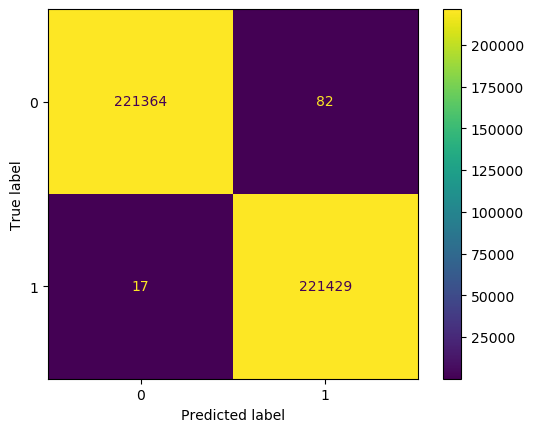

In [55]:
cm = confusion_matrix(y_test, y_pred_test, labels=tree_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree_classf.classes_)
disp.plot()
plt.show()

In [56]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00    221446
        Good       1.00      1.00      1.00    221446

    accuracy                           1.00    442892
   macro avg       1.00      1.00      1.00    442892
weighted avg       1.00      1.00      1.00    442892



## Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
randf_classf = RandomForestClassifier(random_state=42)
randf_classf = GridSearchCV(randf_classf,
             param_grid={'max_depth': [3, 5, 7 ], 'criterion': ["gini"], "n_estimators":[ 300]}, cv=5, scoring="f1")
randf_classf.fit(X_train, y_train);
randf_classf.best_params_, randf_classf.best_score_

({'criterion': 'gini', 'max_depth': 7, 'n_estimators': 300},
 0.9996913629993902)

In [24]:
randf_classf = RandomForestClassifier(max_depth=randf_classf.best_params_["max_depth"], 
                                      criterion=randf_classf.best_params_["criterion"], n_estimators=randf_classf.best_params_["n_estimators"])
randf_classf.fit(X_train, y_train)
y_pred_test = randf_classf.predict(X_test)

rf_acc = accuracy_score( y_pred_test, y_test) 

target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00    221446
        Good       1.00      1.00      1.00    221446

    accuracy                           1.00    442892
   macro avg       1.00      1.00      1.00    442892
weighted avg       1.00      1.00      1.00    442892



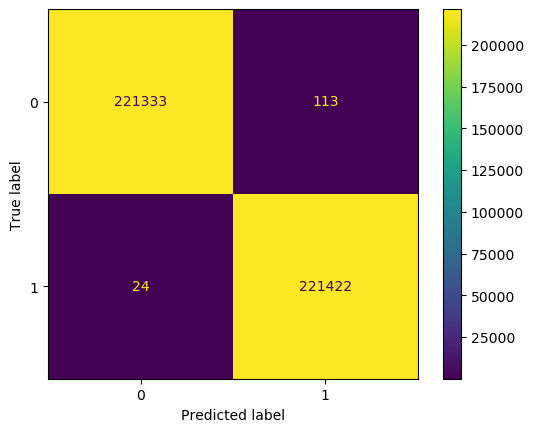

In [26]:
cm = confusion_matrix(y_test, y_pred_test, labels=randf_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=randf_classf.classes_)
disp.plot()
plt.show()

Elapsed time to compute the importances: 0.021 seconds


Text(0, 0.5, 'Mean decrease in impurity')

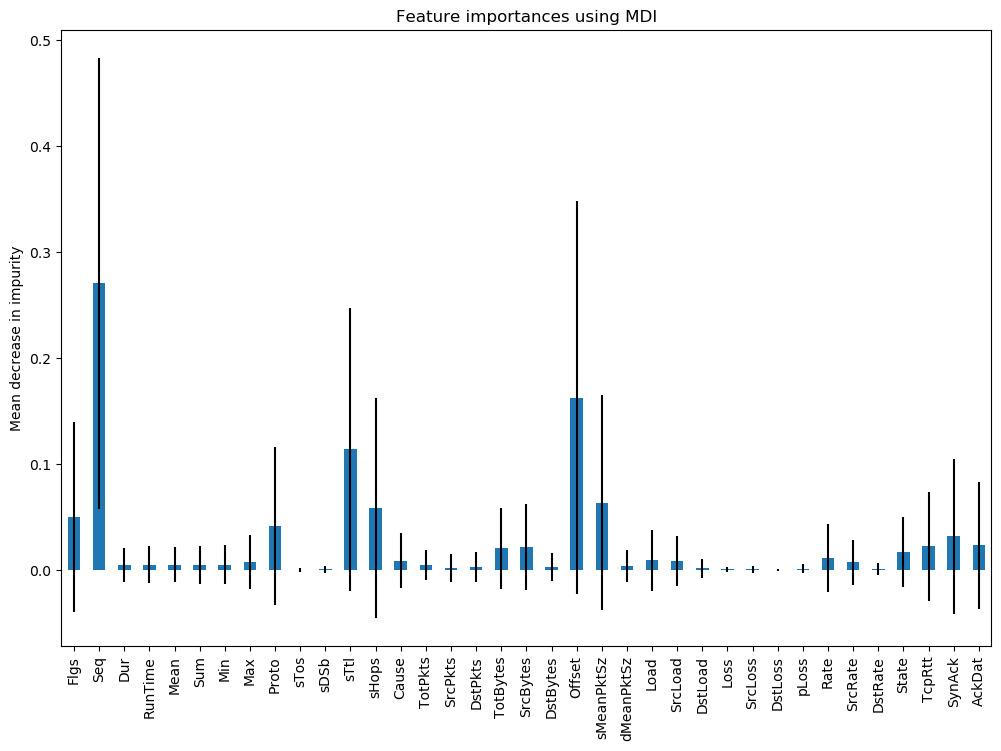

In [27]:
import time
import numpy as np

start_time = time.time()
importances = randf_classf.feature_importances_
std = np.std([tree.feature_importances_ for tree in randf_classf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd
forest_importances = pd.Series(importances, index=data.columns)

fig, ax = plt.subplots(figsize =(12, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [28]:
#! pip install pdpbox

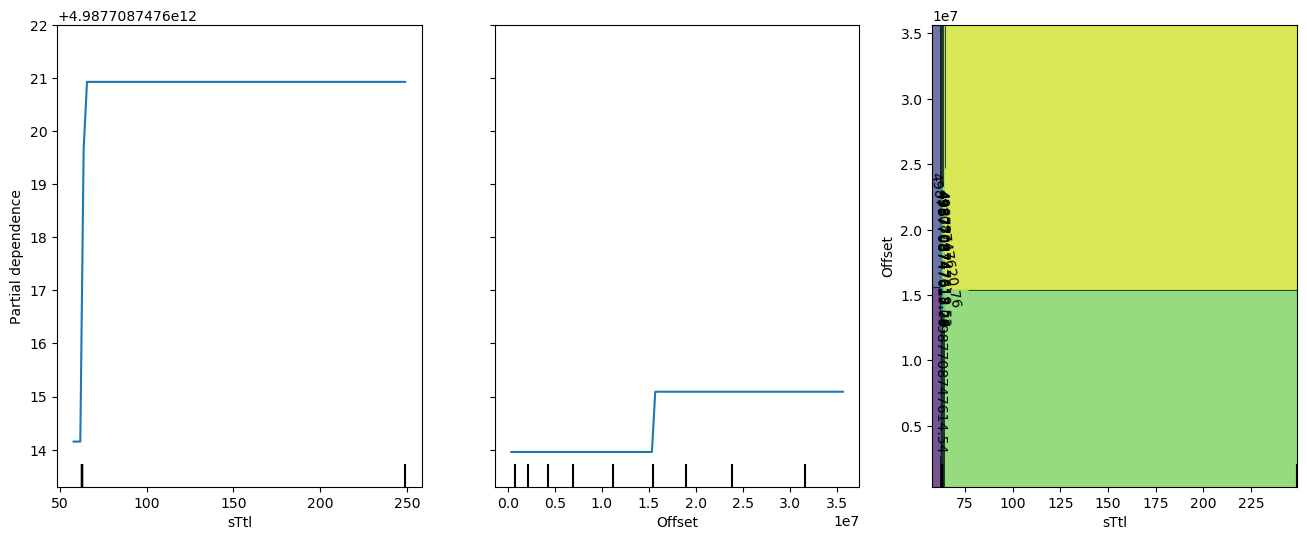

In [61]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(16, 6))
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
features = [11, 20, (11, 20)]
PartialDependenceDisplay.from_estimator(clf, X_train, features, ax=ax)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [30]:
#! conda install -c anaconda py-xgboost

In [31]:
#! conda install -c conda-forge catboost

In [32]:
#! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [33]:
from xgboost import XGBClassifier
import lightgbm as lgb
import numpy as np
from catboost import CatBoostClassifier, Pool

In [34]:
#Using GridSearchCV in XGB

xgb_classf = XGBClassifier(random_state=42)
xgb_classf = GridSearchCV(xgb_classf,
             param_grid={'max_depth': [ 2,3, 5, ], 'learning_rate': [0.001, 0.01,0.1,1], "n_estimators": [5,25,50]}, cv=5, scoring="accuracy" )
xgb_classf.fit(X_train, y_train)
xgb_classf.best_params_, xgb_classf.best_score_

({'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}, 0.9997358271705907)

In [35]:
xgb_classf = XGBClassifier(random_state=42, learning_rate = xgb_classf.best_params_['learning_rate'], n_estimators = xgb_classf.best_params_['n_estimators'],
                         max_depth = xgb_classf.best_params_['max_depth'] )
xgb_classf.fit(X_train, y_train)
y_pred_test = xgb_classf.predict(X_test)

xgb_acc = accuracy_score( y_pred_test, y_test) 

In [36]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00    221446
        Good       1.00      1.00      1.00    221446

    accuracy                           1.00    442892
   macro avg       1.00      1.00      1.00    442892
weighted avg       1.00      1.00      1.00    442892



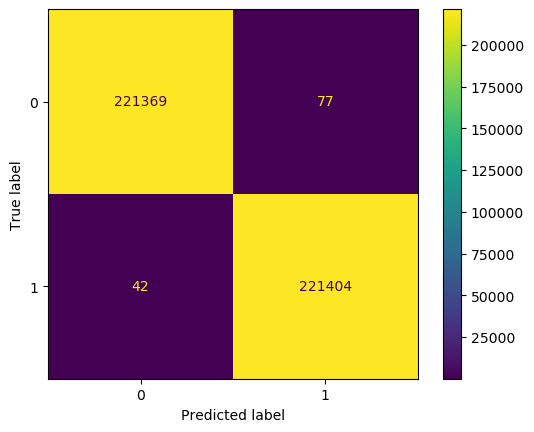

In [37]:
cm = confusion_matrix(y_test, y_pred_test, labels=xgb_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xgb_classf.classes_)
disp.plot()
plt.show()

In [38]:
## CATBoost 

In [39]:
%%capture
cat_classf = CatBoostClassifier(random_state=42, verbose=False)
cat_classf = GridSearchCV(cat_classf,
             param_grid={'depth': [ 2,3, 5, 7], 'learning_rate': [0.001, 0.01,0.1,1], "iterations": [1,2,3,5,10]}, cv=5, scoring="accuracy" )
cat_classf.fit(X_train, y_train)
cat_classf.best_params_, cat_classf.best_score_

In [40]:
model = CatBoostClassifier(iterations=cat_classf.best_params_["iterations"], depth=cat_classf.best_params_["depth"], 
                          learning_rate=cat_classf.best_params_["learning_rate"],random_state=42, verbose=False);
# train the model
model.fit(X_train, y_train);
y_pred_test = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

cat_acc = accuracy_score( y_pred_test, y_test) 

In [41]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00    221446
        Good       1.00      1.00      1.00    221446

    accuracy                           1.00    442892
   macro avg       1.00      1.00      1.00    442892
weighted avg       1.00      1.00      1.00    442892



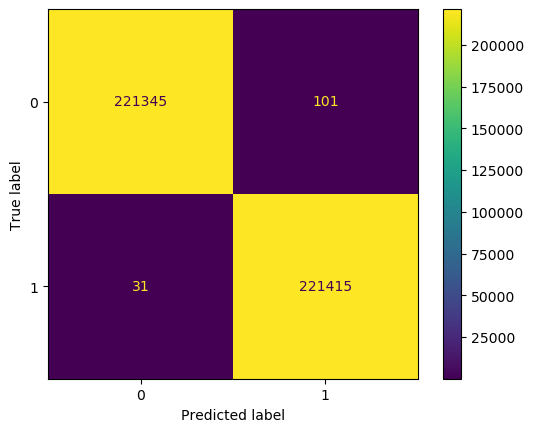

In [42]:
cm = confusion_matrix(y_test, y_pred_test, labels=cat_classf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=cat_classf.classes_)
disp.plot()
plt.show()

In [43]:
## LGBMClassifier

In [44]:
%%capture 
lgb_classif = lgb.LGBMClassifier(random_state=42)
model = GridSearchCV(lgb_classif,
             param_grid={'max_depth': [1, 3, 5, 7, 9 ], 'learning_rate': [0.001, 0.01, 0.1]}, cv=2, scoring="accuracy");
model.fit(X_train,y_train);
model.best_params_

In [45]:
%%capture 
lgb_classif = lgb.LGBMClassifier(learning_rate=model.best_params_["learning_rate"], max_depth=model.best_params_["max_depth"],
                           random_state=42)

lgb_classif.fit(X_train,y_train)

y_pred_test = lgb_classif.predict(X_test)
preds_proba = lgb_classif.predict_proba(X_test)

lgb_acc = accuracy_score( y_pred_test, y_test) 

In [46]:
target_names= ["Bad", "Good"]
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00    221446
        Good       1.00      1.00      1.00    221446

    accuracy                           1.00    442892
   macro avg       1.00      1.00      1.00    442892
weighted avg       1.00      1.00      1.00    442892



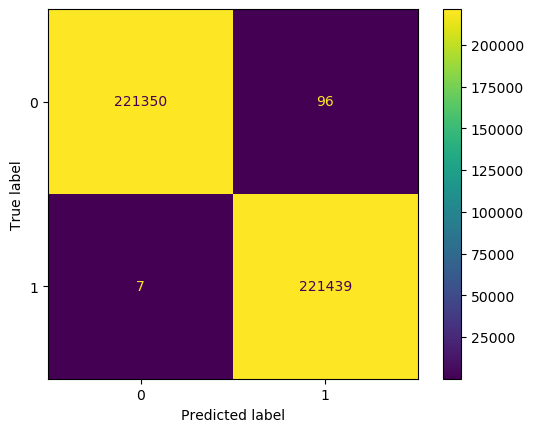

In [47]:
cm = confusion_matrix(y_test, y_pred_test, labels=lgb_classif.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lgb_classif.classes_)
disp.plot()
plt.show()

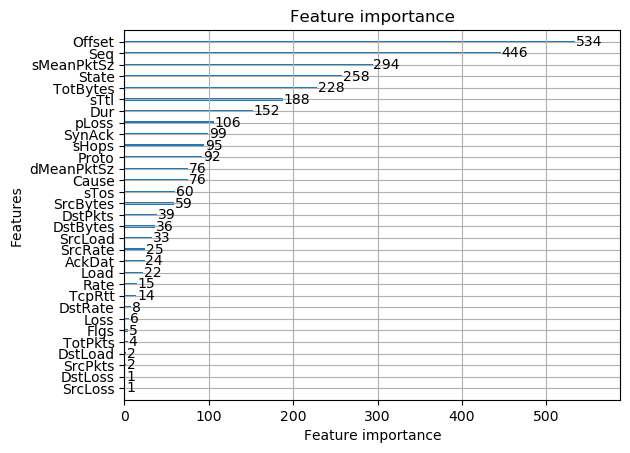

In [48]:
lgb.plot_importance(lgb_classif)

In [59]:
scores = {'DT': [dt_acc], 'RF': [rf_acc], 'XGB': [xgb_acc], 'CAT': [cat_acc], 'LGB' : [lgb_acc]}
df = pd.DataFrame(data=scores)
df



,DT,RF,XGB,CAT,LGB
0,0.999776,0.999691,0.999731,0.999702,0.999767
